In [2]:
# Basic imports
from web3 import Web3
from eth_defi.gmx.config import GMXConfig
from eth_defi.gmx.data import GMXMarketData
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Web3 connection
w3 = Web3(Web3.HTTPProvider("https://arbitrum-mainnet.infura.io/v3/f471d32e596149afa743b9cf7d7ba648"))

# Create GMX configuration
config = GMXConfig(w3)

# Initialize market data provider
market_data = GMXMarketData(config)

# Get open interest data - this is the key line!
open_interest = market_data.get_open_interest()

print("Open Interest retrieved successfully!")
print(f"Long positions: {len(open_interest.get('long', {}))}")
print(f"Short positions: {len(open_interest.get('short', {}))}")

Open Interest retrieved successfully!
Long positions: 41
Short positions: 41


In [5]:
# Extract long and short data
long_data = open_interest.get('long', {})
short_data = open_interest.get('short', {})

# Show top 5 markets by open interest
print("\nTop 5 Markets by Long Open Interest:")
sorted_long = sorted(long_data.items(), key=lambda x: x[1], reverse=True)
for symbol, value in sorted_long[:5]:
    print(f"  {symbol}: ${value:,.0f}")

print("\nTop 5 Markets by Short Open Interest:")
sorted_short = sorted(short_data.items(), key=lambda x: x[1], reverse=True)
for symbol, value in sorted_short[:5]:
    print(f"  {symbol}: ${value:,.0f}")

# Combine data into DataFrame
df_data = []
all_symbols = set(list(long_data.keys()) + list(short_data.keys()))

for symbol in all_symbols:
    long_oi = long_data.get(symbol, 0)
    short_oi = short_data.get(symbol, 0)
    total_oi = long_oi + short_oi
    
    if total_oi > 0:
        df_data.append({
            'symbol': symbol,
            'long_oi': long_oi,
            'short_oi': short_oi,
            'total_oi': total_oi,
            'net_oi': long_oi - short_oi
        })

df = pd.DataFrame(df_data).sort_values('total_oi', ascending=False)
print(f"\nCreated DataFrame with {len(df)} markets")
print(df.head())


Top 5 Markets by Long Open Interest:
  ETH: $35,144,079
  BTC: $21,638,008
  LINK: $10,455,428
  SOL: $6,486,790
  ETH2: $4,293,411

Top 5 Markets by Short Open Interest:
  ETH: $38,563,812
  BTC: $26,544,904
  LINK: $9,942,149
  SOL: $6,073,820
  ETH2: $5,448,751

Created DataFrame with 40 markets
   symbol       long_oi      short_oi      total_oi        net_oi
37    ETH  3.514408e+07  3.856381e+07  7.370789e+07 -3.419733e+06
9     BTC  2.163801e+07  2.654490e+07  4.818291e+07 -4.906895e+06
34   LINK  1.045543e+07  9.942149e+06  2.039758e+07  5.132787e+05
5     SOL  6.486790e+06  6.073820e+06  1.256061e+07  4.129703e+05
26   ETH2  4.293411e+06  5.448751e+06  9.742162e+06 -1.155340e+06


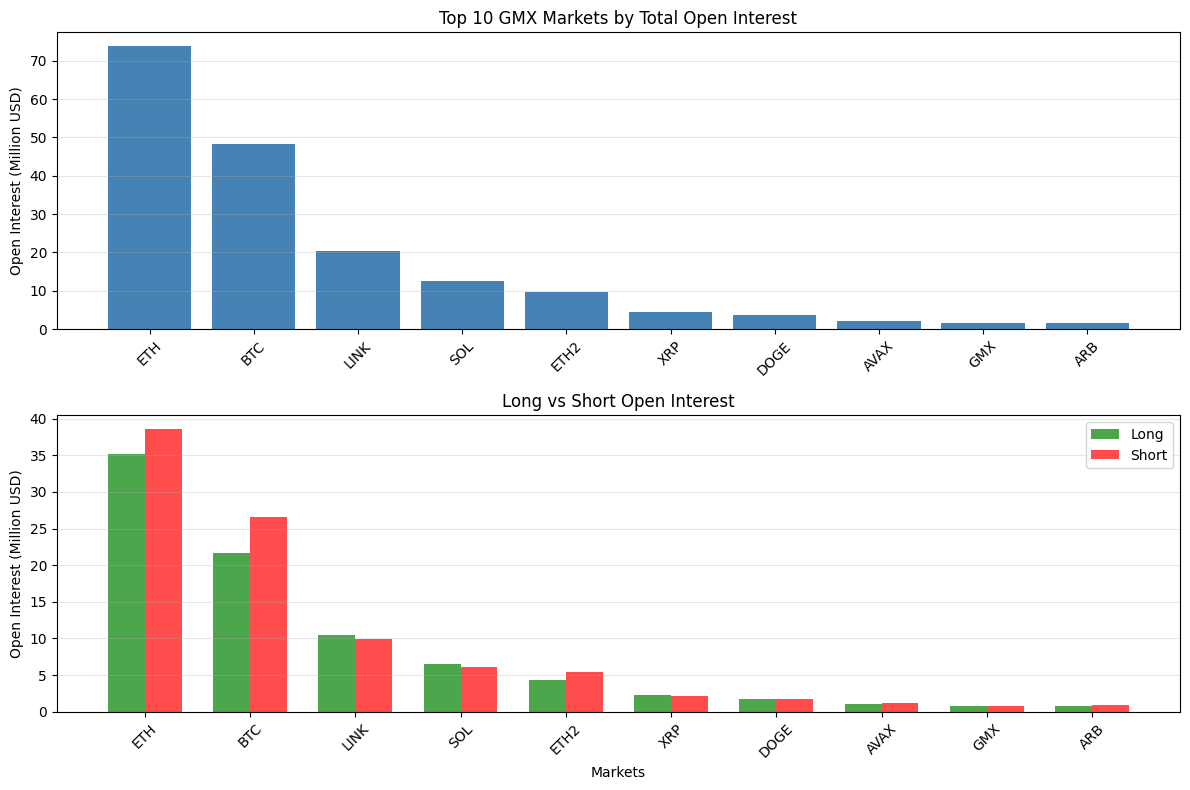

In [6]:
# Create simple bar chart of top 10 markets
top_10 = df.head(10)

plt.figure(figsize=(12, 8))

# Plot 1: Total Open Interest
plt.subplot(2, 1, 1)
plt.bar(top_10['symbol'], top_10['total_oi'] / 1e6, color='steelblue')
plt.title('Top 10 GMX Markets by Total Open Interest')
plt.ylabel('Open Interest (Million USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Plot 2: Long vs Short comparison
plt.subplot(2, 1, 2)
x = range(len(top_10))
width = 0.35
plt.bar([i - width/2 for i in x], top_10['long_oi'] / 1e6, width, 
        label='Long', color='green', alpha=0.7)
plt.bar([i + width/2 for i in x], top_10['short_oi'] / 1e6, width, 
        label='Short', color='red', alpha=0.7)

plt.title('Long vs Short Open Interest')
plt.ylabel('Open Interest (Million USD)')
plt.xlabel('Markets')
plt.xticks(x, top_10['symbol'], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()